# Задача 1. Сделать реверс односвзяного списка.

*Пример: 
Входные данные: 1, 2, 3, 4, 5. 
Результат: 5, 4, 3, 2, 1*


In [1]:
class Node():
    def __init__(self, data):
        self.data = data
        self.next = None
        
class linked_list():
    def __init__(self):
        self.header = None

    def append_node(self, data):
        if self.header :
            cur_node = self.header
            while cur_node.next:
                cur_node = cur_node.next
            cur_node.next = Node(data)
        else:
            self.header = Node(data)
    
    def print_list(self):
        curr = self.header
        print('start', end=" -> ")
        while curr:
            print(curr.data, end=" -> ")
            curr = curr.next
        print('end')
# затраты по памяти - константа O(1)
# оценка сложности - O(n)
    def reverse_list(self):
        prev = None
        curr = self.header
        while curr and curr.next:
            next = curr.next
            curr.next = prev
            prev = curr
            curr = next
        self.header = curr
        self.header.next = prev

In [2]:
a = linked_list()
a.append_node(5)
a.append_node(55)
a.append_node(355)
a.print_list()
a.reverse_list()
a.print_list()

start -> 5 -> 55 -> 355 -> end
start -> 355 -> 55 -> 5 -> end


# Задача 2.

Память - O(d × n) - хранение признаков всех документов

Первоначальная сортировка: O(d log d)
Вычисление релевантностей: O(d × n)

Запрос типа 1 (получить топ-k): O(k)
Запрос типа 2 (изменить признак):  O(log d) - бинарный поиск, удаление из списка: O(d) -  в худшем случае -> O(d) в худшем случае

In [36]:
def binary_search_left(arr, x):
    """
    Бинарный поиск для нахождения позиции вставки
    """
    left, right = 0, len(arr)
    while left < right:
        mid = (left + right) // 2
        if arr[mid] < x:
            left = mid + 1
        else:
            right = mid
    return left

def solve_ranking_problem(input_data):
    """
    Решает задачу ранжирования с входными данными в виде строки
    """
    lines = input_data.strip().split('\n')
    idx = 0
    
    # Чтение количества параметров
    n = int(lines[idx]); idx += 1
    
    # Чтение параметров формулы
    a = list(map(int, lines[idx].split())); idx += 1
    
    # Чтение количества объектов
    d = int(lines[idx]); idx += 1
    
    # Структуры для хранения данных
    docs = []  # список кортежей (-релевантность, id)
    features = {}
    relevances = {}
    
    # Чтение объектов
    for doc_id in range(1, d + 1):
        doc_features = list(map(int, lines[idx].split()))
        idx += 1
        
        # Вычисление релевантности
        relevance = sum(a[i] * doc_features[i] for i in range(n))
        
        features[doc_id] = doc_features
        relevances[doc_id] = relevance
        docs.append((-relevance, doc_id))
    
    # Сортируем документы по убыванию релевантности
    docs.sort()
    
    # Чтение количества запросов
    q = int(lines[idx]); idx += 1
    
    results = []
    
    # Обработка запросов
    for _ in range(q):
        query_parts = lines[idx].split()
        idx += 1
        
        query_type = int(query_parts[0])
        
        if query_type == 1:
            # Запрос на получение k самых релевантных
            k = int(query_parts[1])
            top_k = [str(doc_id) for _, doc_id in docs[:k]]
            results.append(" ".join(top_k))
            
        else:
            # Запрос на изменение признака: 2 doc_id feature_index new_value
            doc_id = int(query_parts[1])
            feature_idx = int(query_parts[2]) - 1  # переводим в 0-based индекс
            new_value = int(query_parts[3])
            
            # Удаляем старую версию документа из списка
            old_relevance = relevances[doc_id]
            target = (-old_relevance, doc_id)
            
            # Ищем позицию для удаления
            pos = binary_search_left(docs, target)
            if pos < len(docs) and docs[pos] == target:
                docs.pop(pos)
            
            # Обновляем признак
            old_feature_value = features[doc_id][feature_idx]
            features[doc_id][feature_idx] = new_value
            
            # Пересчитываем релевантность
            delta = a[feature_idx] * (new_value - old_feature_value)
            new_relevance = old_relevance + delta
            relevances[doc_id] = new_relevance
            
            # Вставляем обновленный документ на правильную позицию
            new_entry = (-new_relevance, doc_id)
            insert_pos = binary_search_left(docs, new_entry)
            docs.insert(insert_pos, new_entry)
    
    return results

# Пример использования с тестовыми данными
if __name__ == "__main__":
    # Входные данные как строка
    input_str = """2
1 100
10
1 2
2 1
3 1
4 1
5 1
6 1
7 1
8 1
9 1
10 1
4
1 2
1 10
2 4 1 1000
1 10"""
    
    # Решаем задачу
    output = solve_ranking_problem(input_str)
    
    # Выводим результаты
    for line in output:
        print(line)

1 10
1 10 9 8 7 6 5 4 3 2
4 1 10 9 8 7 6 5 3 2


# Задача 3.
Реализовать балансировку красно-черного дерева

Бинарное дерево поиска является красно-черным деревом, если оно удовлетворяет следующим красно-черным свойствам.
1. Каждый узел является красным или черным.
2. Корень дерева является черным.
3. Каждый лист дерева (NIL) является черным.
4. Если узел - красный, то оба его дочерних узла - черные.
5. Для каждого узла все пути от него до листьев, являющихся потомками
данного узла, содержат одно и то же количество черных узлов.

Разбор балансировки с [habr](https://habr.com/ru/companies/otus/articles/472040/)

![case 1](/Users/lidaflorenskaya/Documents/АлгБио/Алгоритмы-2025/case_1.jpeg)
![case 2](/Users/lidaflorenskaya/Documents/АлгБио/Алгоритмы-2025/case_2.jpeg)
![case 3](/Users/lidaflorenskaya/Documents/АлгБио/Алгоритмы-2025/case_3.jpeg)



In [28]:
class Node():
    def __init__(self, data):
        self.data = data
        self.right = None
        self.left = None
        self.parent = None
        self.color = "RED"

class Tree():
    def __init__(self):
        self.root = None
    
    def insert(self, data):
        print(f"\nВставляем {data}")
        
        new_node = Node(data)
        if not self.root:
            self.root = new_node
            self.root.color = "BLACK"
            print("После вставки:")
            self.print()
            return
        
        current, parent = self.root, None
        while current:
            parent = current
            if data < current.data:
                current = current.left
            else:
                current = current.right
        
        new_node.parent = parent
        if data < parent.data:
            parent.left = new_node
        else:
            parent.right = new_node
        
        print("После вставки до балансировки:")
        self.print()
        
        self.balance_insert(new_node)
        
        print("После балансировки:")
        self.print()
    
    def balance_insert(self, node):
        while node != self.root and node.parent.color == "RED":
            parent, grandparent = node.parent, node.parent.parent
            
            if parent == grandparent.left:
                uncle = grandparent.right
                if uncle and uncle.color == "RED":
                    print("Case 1: дядя красный")
                    self.case_1(parent, uncle, grandparent)
                    node = grandparent
                else:
                    if node == parent.right:
                        print("Case 2: узел справа")
                        node = parent
                        self.small_rotation(node, 0)
                    print("Case 3: большой поворот")
                    self.case_3(parent, grandparent)
                    break
            else:
                uncle = grandparent.left
                if uncle and uncle.color == "RED":
                    print("Case 1: дядя красный")
                    self.case_1(parent, uncle, grandparent)
                    node = grandparent
                else:
                    if node == parent.left:
                        print("Case 2: узел слева")
                        node = parent
                        self.small_rotation(node, 1)
                    print("Case 3: большой поворот")
                    self.case_3(parent, grandparent)
                    break
        
        self.root.color = "BLACK"
    
    def case_1(self, parent, uncle, grandparent):
        parent.color = uncle.color = "BLACK"
        if grandparent != self.root:
            grandparent.color = "RED"
    
    def case_3(self, parent, grandparent):
        parent.color = "BLACK"
        grandparent.color = "RED"
        if parent == grandparent.left:
            self.big_rotation(grandparent, 1)
        else:
            self.big_rotation(grandparent, 0)

    def small_rotation(self, node, direction):
        if direction == 1:
            print(f"Малый правый поворот вокруг {node.data}")
            new_root = node.left
            node.left = new_root.right
            if new_root.right: 
                new_root.right.parent = node
            new_root.right = node
        else:
            print(f"Малый левый поворот вокруг {node.data}")
            new_root = node.right
            node.right = new_root.left
            if new_root.left: 
                new_root.left.parent = node
            new_root.left = node
        
        new_root.parent = node.parent
        node.parent = new_root
        
        if not new_root.parent:
            self.root = new_root
        elif new_root.parent.left == node:
            new_root.parent.left = new_root
        else:
            new_root.parent.right = new_root
        
        return new_root

    def big_rotation(self, node, direction):
        if direction == 1:
            print(f"Большой правый поворот вокруг {node.data}")
            # Левый-правый: сначала левый поворот для левого ребенка, потом правый для узла
            if node.left and node.left.right:
                self.small_rotation(node.left, 0)
            return self.small_rotation(node, 1)
        else:
            print(f"Большой левый поворот вокруг {node.data}")
            # Правый-левый: сначала правый поворот для правого ребенка, потом левый для узла
            if node.right and node.right.left:
                self.small_rotation(node.right, 1)
            return self.small_rotation(node, 0)

    def print(self):
        if not self.root:
            print("Пусто")
            return
        self.print_(self.root)
        print()

    def print_(self, node):
        if node:
            color = "R" if node.color == "RED" else "B"
            print(f"{node.data}({color})", end=" ")
            if node.left:
                self.print_(node.left)
            if node.right:
                self.print_(node.right)

# Тест
if __name__ == "__main__":
    tree = Tree()
    for val in [10, 20, 30, 5, 3, 7]:
        tree.insert(val)


Вставляем 10
После вставки:
10(B) 

Вставляем 20
После вставки до балансировки:
10(B) 20(R) 
После балансировки:
10(B) 20(R) 

Вставляем 30
После вставки до балансировки:
10(B) 20(R) 30(R) 
Case 3: большой поворот
Большой левый поворот вокруг 10
Малый левый поворот вокруг 10
После балансировки:
20(B) 10(R) 30(R) 

Вставляем 5
После вставки до балансировки:
20(B) 10(R) 5(R) 30(R) 
Case 1: дядя красный
После балансировки:
20(B) 10(B) 5(R) 30(B) 

Вставляем 3
После вставки до балансировки:
20(B) 10(B) 5(R) 3(R) 30(B) 
Case 3: большой поворот
Большой правый поворот вокруг 10
Малый правый поворот вокруг 10
После балансировки:
20(B) 5(B) 3(R) 10(R) 30(B) 

Вставляем 7
После вставки до балансировки:
20(B) 5(B) 3(R) 10(R) 7(R) 30(B) 
Case 1: дядя красный
После балансировки:
20(B) 5(R) 3(B) 10(B) 7(R) 30(B) 


# Задача 4

У вас есть данные о ценах акций за n дней в виде массива prices. Вы можете совершить не более k сделок (покупка + продажа = 1 сделка).

Найдите максимальную прибыль, которую можно получить, соблюдая правила:
- Нельзя совершать несколько сделок одновременно (нельзя купить и продать в один и тот же день)
- Нельзя покупать, если уже есть купленные акции
- Можно совершать любое количество сделок, но не более k

Пример:

prices = [3, 2, 6, 5, 0, 3], k = 2

Максимальная прибыль: 7

Объяснение: 

Покупка в день 2 (цена 2), продажа в день 3 (цена 6) → прибыль 4

Покупка в день 5 (цена 0), продажа в день 6 (цена 3) → прибыль 3

Итого: 4 + 3 = 7


In [ ]:
prices, k = [3, 2, 6, 5, 0, 3], 2

<BarContainer object of 7 artists>

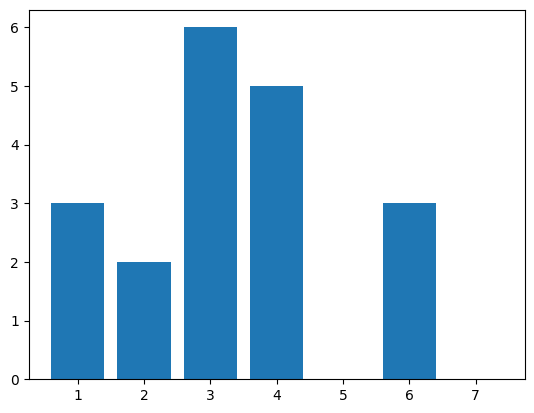

In [35]:
import matplotlib.pyplot as plt
plt.bar(range(1,len(prices)+1),prices)

In [ ]:
def dynamic_max(prices, k):
    n = len(prices)
    df = [[0] * n for _ in range(k+1)]
    for transaction in range(1, k + 1):
        max_balance = -prices[0] #максимальный баланс после покупки акции
        for day in range(1, n):
            # продавать ли? берем максимум из прибыли вчера и цены сегодня+баланс после покупки
            df[transaction][day] = max(df[transaction][day - 1], prices[day] + max_balance)
            # покупать ли? берем текущегго максимума и  прибыли от прошлых сделок - цена сегодня
            max_balance = max(max_balance, df[transaction - 1][day] - prices[day])
    for transaction in df:
        print(transaction)
    return df[k][n - 1]

In [60]:
print(prices)
dynamic_max(prices,k)

[3, 2, 6, 5, 0, 3, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 4, 4, 4, 4, 4]
[0, 0, 4, 4, 4, 7, 7]


7

# Задача 5
Дана информация о времени заезда и отъезда посетителей отеля. Необходимо определить, в какой день посетителей в отеле единомоментно находилось больше всего.

Пример входных данных (один элемент данного листа – кортеж, содержащий дату заезда и отъезда одного посетителя): [(“2024-09-15”, “2024-09-15”), (“2024-09-14”, “2024-09-21”)]


In [ ]:
#память О(n), сложность O(nlog(n)) из-за сортировки
L = [("2024-09-15", "2024-09-15"), ("2024-09-14", "2024-09-21")]
def max_booking(L):
    events = []
    for (inn, out) in L:
        events.append((inn, 1))   # прибытие
        events.append((out, -1))

    max_occupancy = 0
    current_occupancy = 0
    max_day = None
    
    events = sorted(events, key=lambda x: x[0])
    # Обрабатываем события в хронологическом порядке
    for day, event_type in events:
        current_occupancy += event_type

        # Обновляем максимум если нашли новый
        if current_occupancy > max_occupancy:
            max_occupancy = current_occupancy
            max_day = day
    
    return max_day, max_occupancy

max_booking(L)

('2024-09-15', 2)

# Задача 6.
Реализовать алгоритм Беллмана-Форда для произвольного графа

Алгоритм Беллмана-Форда (Bellman-Ford algorithm) позволяет решить зада-
чу о кратчайшем пути из одной вершины в общем случае, когда вес каждого из
ребер может быть отрицательным.

Без потери общности можно предположить, что если ведется
поиск кратчайших путей, они не содержат циклов.

Для заданного взвешенного ориентированного
графа G = (V,E) с истоком s и весовой функцией w : Е → R алгоритм Белл-
мана-Форда возвращает логическое значение, указывающее на то, содержится ли
в графе цикл с отрицательным весом, достижимый из истока . Если такой цикл
существует, в алгоритме указывается, что решения не существует. Если же таких
циклов нет, алгоритм выдает кратчайшие пути и их вес.

Поскольку в любой ациклический путь в графе G = (V, E) входит не более |V| различных вершин, в нем
также содержится не более |V| - 1 ребер. Таким образом, можно ограничиться рассмотрением кратчайших путей, состоящих не более чем из |V| - 1 ребер.

Алгоритм Беллмана-Форда (Bellman-Ford algorithm) позволяет решить зада-
чу о кратчайшем пути из одной вершины в общем случае, когда вес каждого из
ребер может быть отрицательным. 


Алгоритм Беллмана-Форда завершает свою работу в течение времени О (V E),
поскольку инициализация в строке 1 занимает время O(V), на каждый из |V| - 1 проходов по ребрам требуется время О (Е), а на выполнение цикла for ниже - время О (Е).

![graph](/Users/lidaflorenskaya/Documents/АлгБио/Алгоритмы-2025/graph.png)

In [ ]:
import math

def Bellman_Ford(graph, edges, source):
    distances = [math.inf] * len(graph)
    distances[source] = 0
    
    operations = 0
    
    # Основной цикл релаксации
    for _ in range(len(graph) - 1):
        updated = False
        for u, v, weight in edges:
            operations += 1 
            if distances[u] != math.inf and distances[u] + weight < distances[v]:
                distances[v] = distances[u] + weight
                updated = True
        
        if not updated:
            break
    
    # Проверка на отрицательные циклы
    for u, v, weight in edges:
        operations += 1
        if distances[u] != math.inf and distances[u] + weight < distances[v]:
            return None, operations
    
    return distances, operations

In [13]:
import random
# Граф
graph = [[0]*5 for _ in range(5)]
graph[0][1] = 6
graph[0][2] = 7
graph[1][2] = 8
graph[1][3] = 5
graph[1][4] = -4
graph[2][3] = -3
graph[2][4] = 9
graph[3][1] = -2
graph[4][0] = 2
graph[4][3] = 7

# Базовые ребра
base_edges = []
for i in range(len(graph)):
    for j in range(len(graph[i])):
        if graph[i][j] != 0:
            base_edges.append((i, j, graph[i][j]))

for i in range(5):
    if i == 0:
        edges = base_edges.copy()  # исходный порядок
        name = "Исходный порядок"
    else:
        edges = base_edges.copy()
        random.shuffle(edges)  # случайный порядок
        name = f"Случайный порядок {i}"
    
    result, operations = Bellman_Ford(graph, edges, 0)
    print(f"{name}: {operations} операций")
    print(f"Результат: {result}\n")



Исходный порядок: 40 операций
Результат: [0, 2, 7, 4, -2]

Случайный порядок 1: 50 операций
Результат: [0, 2, 7, 4, -2]

Случайный порядок 2: 40 операций
Результат: [0, 2, 7, 4, -2]

Случайный порядок 3: 50 операций
Результат: [0, 2, 7, 4, -2]

Случайный порядок 4: 50 операций
Результат: [0, 2, 7, 4, -2]

